In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
import plotly.express as px
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [14]:
df = pd.read_csv('data.csv')

In [15]:
df.head()

,site_number,latitude,longitude,state,county,city,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,Sulfur dioxide,aqi,date,year,month
0,2,40.253611,-111.663056,Utah,Utah,Provo,NaN,43.0,27.0,34.5,83.5,NaN,83.5,2017-01-01,2017,1
1,2,40.253611,-111.663056,Utah,Utah,Provo,5.0,24.0,23.0,8.0,22.5,NaN,24.0,2017-01-02,2017,1
2,2,40.253611,-111.663056,Utah,Utah,Provo,8.0,45.0,18.5,17.0,43.0,NaN,45.0,2017-01-03,2017,1
3,2,40.253611,-111.663056,Utah,Utah,Provo,8.0,41.0,31.0,4.0,4.5,NaN,41.0,2017-01-04,2017,1
4,2,40.253611,-111.663056,Utah,Utah,Provo,3.0,27.0,29.0,7.0,19.0,NaN,29.0,2017-01-05,2017,1


In [56]:
# ut = df[df['state']=='Utah']
# az = df[df['state']=='Arizona']

dfw = df.groupby(['state','date'])[['aqi']].max().reset_index()
dfw = dfw.pivot(index='date', columns='state', values='aqi')
dfw.head(3)

state,Arizona,Utah
date,,
2017-01-01,53.0,83.5
2017-01-02,39.0,39.0
2017-01-03,44.0,45.0


In [59]:
dfw.index = pd.to_datetime(dfw.index)

In [60]:
dfw.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [48]:
sns.set_style('darkgrid')

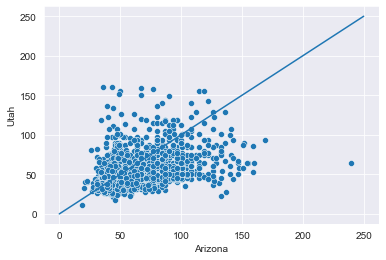

In [49]:
sns.scatterplot(data=dfw, x='Arizona',y='Utah')
plt.plot((0,250),(0,250))

In [50]:
(dfw['Arizona'] > dfw['Utah']).mean

0.6883899233296824

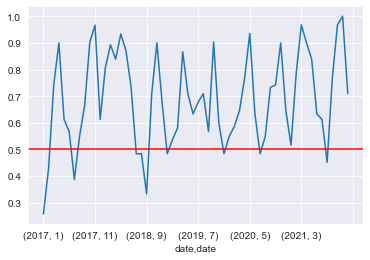

In [80]:
dfw['agu'] = dfw['Arizona'] > dfw['Utah']
dfw.groupby([dfw.index.year, dfw.index.month])['agu'].mean().plot()
plt.axhline(y=0.5, color='r', linestyle='-')

In [16]:
aqi_bins = [0,50,100,150,250]

In [17]:
df['aqi_cat'] = pd.cut(df['aqi'],aqi_bins,labels=['good','moderate','unhealthy for sensitive groups','unhealthy'])

In [18]:
pd.crosstab(df['state'], df['aqi_cat'])

aqi_cat,good,moderate,unhealthy for sensitive groups,unhealthy
state,,,,
Arizona,8399,3096,346,14
Utah,2886,1034,84,10


1825

In [22]:
#df.groupby(['state','year','month'])[['aqi']].max().reset_index()

<AxesSubplot:xlabel='month', ylabel='aqi'>

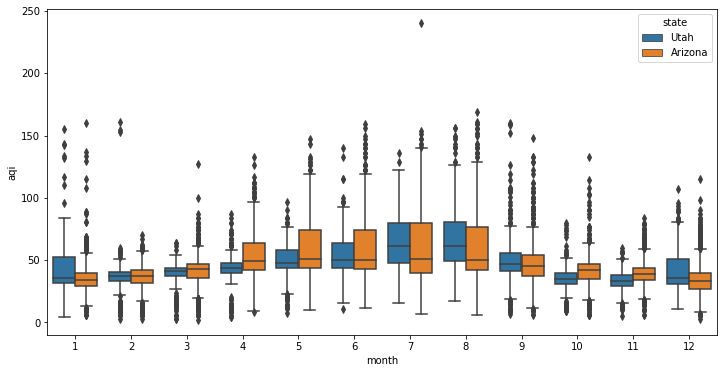

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='month', y='aqi', hue='state')


In [51]:
dfw.set_index('date', parse)

In [52]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 2017-01-01 to 2021-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arizona  1826 non-null   float64
 1   Utah     1826 non-null   float64
dtypes: float64(2)
memory usage: 42.8+ KB


<AxesSubplot:xlabel='date'>

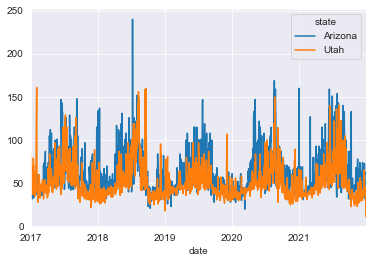

In [61]:
dfw.plot()

In [64]:
dfw.resample(rule='D').mean()

state,Arizona,Utah
date,,
2017-01-01,53.0,83.5
2017-01-02,39.0,39.0
2017-01-03,44.0,45.0
2017-01-04,56.0,41.0
2017-01-05,45.0,37.0
...,...,...
2021-12-27,39.0,38.0
2021-12-28,32.0,37.0
2021-12-29,37.0,46.5


<AxesSubplot:xlabel='date,date'>

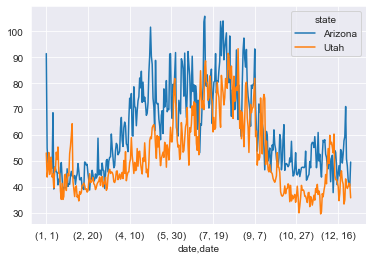

In [70]:
dfw.groupby([dfw.index.month, dfw.index.day]).mean().plot()